<a href="https://colab.research.google.com/github/rr-y/Project_7thsem/blob/master/Keras1_ferufe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import cv2
import time
import sys
import os
#import glob
from PIL import Image
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import graphviz
import pydot


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


## Connecting Google Drive to Google Colab

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("fer2013.csv")


## Data Reading and Preprocessing

In [7]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['pixels'], df['emotion'], test_size=0.3, random_state=30)

In [0]:
df_train=pd.DataFrame({'index':X_train.index, 'value':X_train.values})

In [0]:
df_test=pd.DataFrame({'index':X_test.index, 'value':X_test.values})

In [0]:
X_train=df_train['value']

In [0]:
X_test=df_test['value']


In [0]:
images=[]

for i in range(len(X_train)):
    image_string = X_train[i]
    image = [int(x) for x in image_string.split()]
    image=np.array(image,dtype='float32')
    image=image.reshape((48,48,1))
    images.append(image)

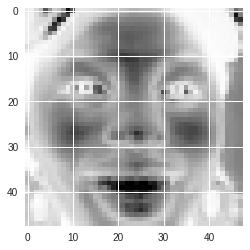

In [16]:
plt.imshow(images[2].reshape((48,48)))


In [0]:
images_test=[]

for i in range(len(X_test)):
    image_string = X_test[i]
    image = [int(x) for x in image_string.split()]
    image=np.array(image,dtype='float32')
    image=image.reshape((48,48,1))
    images_test.append(image)

In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [19]:
y_train_hot=convert_to_one_hot(y_train,7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [20]:
y_test_hot=convert_to_one_hot(y_test,7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [0]:
images_train=np.array(images)


In [0]:
images_test=np.array(images_test)


In [23]:
images=np.array(images)
images_test=np.array(images_test)
images_test.reshape((10767,2304)).shape

(10767, 2304)

In [24]:
images_test.shape

(10767, 48, 48, 1)

## Model Architecture

In [0]:
model = Sequential()
#layer1
model.add(Conv2D(128, (3, 3),padding = "same", activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer2
model.add(Conv2D(64, (3, 3), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#layer3
model.add(Conv2D(32, (3, 3), activation='relu',padding = "same"))

#layer4
model.add(Conv2D(32, (3, 3), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#FC1
model.add(Flatten())
model.add(Dense(64, activation='relu'))

#FC2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

#FC3
model.add(Dense(7, activation='softmax'))



In [0]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics = ["accuracy"])

## Summary of Model Architecture

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 128)       1280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 32)        18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 32)        9248      
__________

## Training

In [46]:
history=model.fit(images_train, y_train_hot, epochs=300, verbose=1, batch_size=64,
                                    initial_epoch=0, shuffle=True)


Epoch 1/300
25120/25120 [==============================] - 12s 464us/step - loss: 1.7279 - acc: 0.2994
Epoch 2/300
25120/25120 [==============================] - 11s 457us/step - loss: 1.7005 - acc: 0.3150
Epoch 3/300
25120/25120 [==============================] - 11s 457us/step - loss: 1.6651 - acc: 0.3294
Epoch 4/300
25120/25120 [==============================] - 12s 458us/step - loss: 1.6470 - acc: 0.3405
Epoch 5/300
25120/25120 [==============================] - 12s 459us/step - loss: 1.6215 - acc: 0.3527
Epoch 6/300
25120/25120 [==============================] - 12s 460us/step - loss: 1.6041 - acc: 0.3655
Epoch 7/300
25120/25120 [==============================] - 12s 458us/step - loss: 1.5934 - acc: 0.3723
Epoch 8/300
25120/25120 [==============================] - 11s 457us/step - loss: 1.5815 - acc: 0.3746
Epoch 9/300
25120/25120 [==============================] - 12s 458us/step - loss: 1.5694 - acc: 0.3764
Epoch 10/300
25120/25120 [==============================] - 12s 458us/ste

#  Helper Functions

### For Plotting Accuracy

In [0]:

def plot_accuracy(history):
  plt.figure(figsize = (15,5))
  plt.plot(history.history['acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  
  # Plot training & validation loss values
  plt.figure(figsize=(15,5))
  plt.plot(history.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  

### Accuracy and Saving the Model

In [0]:
def model_accuracy(x_test,y_test):
  scores = model.evaluate(images_test, y_test_hot, verbose=2)
  print(scores[1]*100,"%")

In [0]:
def save_model(model):
  model.save_weights("keras.hdf5",overwrite=True)

In [144]:
y_predict = model.predict_classes(images_test, verbose=1)

10767/10767 [==============================] - 2s 219us/step


In [0]:
y_test =np.array(y_test)

In [0]:
cm = confusion_matrix(y_target=y_test, y_predicted=y_predict)

### For Plotting Confusion Matrix

In [0]:
def plot_cm(cm):
  plt.figure(figsize=(10,5))
  column = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
  df_cm = pd.DataFrame(cm, index=column,columns=column)
  ax = sns.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g')

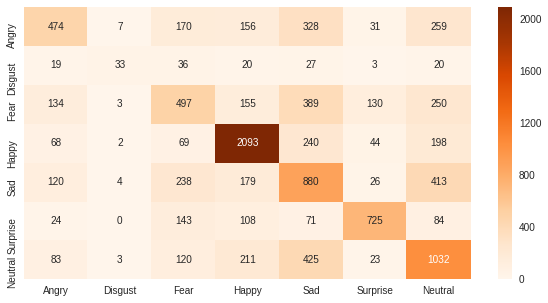

In [149]:
plot_cm(cm)

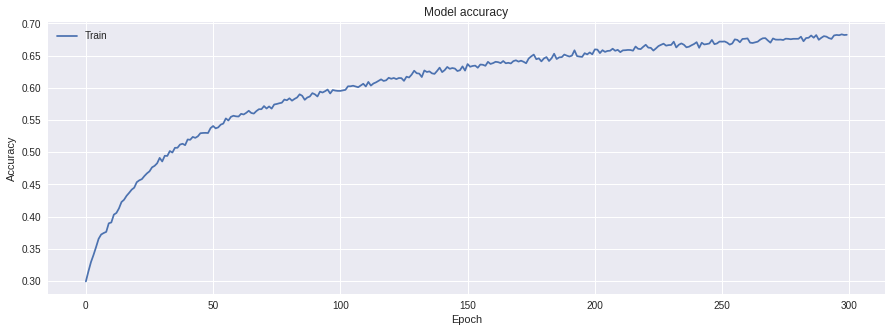

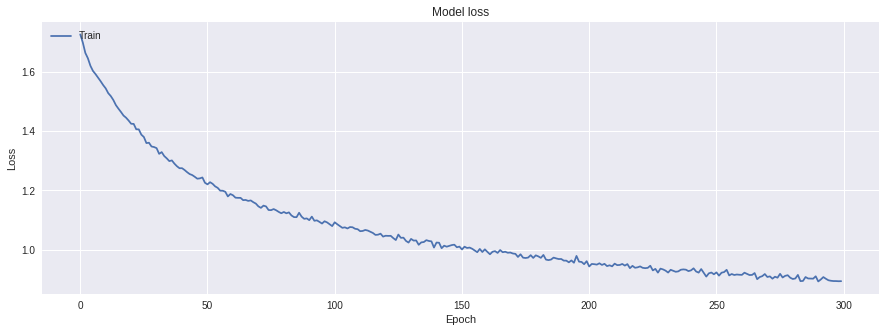

In [153]:
plot_accuracy(history)

In [154]:
model_accuracy(images_test,y_test_hot)

53.25531717616446 %
